# Visualizing results from the EML Sensitivity Analysis Study Lab2
Here we will visualize the outputs from the Sensitivity Analysis Run
The following will use pre-run results for 1,000 samples on GPP for Eight Mile Lake Study Site

In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc

### Setup
Here we will read the results from the Sensitivity Analysis run.This folder will contain 1,000 samples have been pre-run and compiled into the Results Directory for Lab 4. 

In [ ]:
fdir='/home/vbriones/tem-output/sensitivity_analysis/'

In [ ]:

def get_output_var_size(fdir,oname):   
    filename = fdir+'Sample_Folder/'+item+'/output/'+oname+'_monthly_tr.nc'
    stg_data = nc.Dataset(filename, 'r')
    print('{} dim:',oname,len(stg_data.dimensions))

def get_samples(fdir,oname):
    #make a list of all output files  
    
    fname = oname+'_monthly_tr.nc'
    fsamples = []
    for item in os.listdir(fdir):
        if item[:6]=='sample':
            fsamples.append(fdir+item+'/output/'+fname)
    fsamples.sort()

    return fsamples

def get_output_var_size(fdir,oname):   
    filename = fdir+item+'/output/'+oname+'_monthly_tr.nc'
    stg_data = nc.Dataset(filename, 'r')
    print(oname,'dim:',len(stg_data.dimensions))

    
def plot3D_ts(fdir,oname):
    fsamples = get_samples(fdir,oname)
    #get the 'oname' variable time series from the correspoding output nc files  
    stg_data = nc.Dataset(fsamples[0], 'r')
    #print(stg_data.shape)
    
    df1 = pd.DataFrame(stg_data.variables[oname][0:,0,0], columns=[oname+'_0'])   
    for i in range(1,len(fsamples)):
        stg_data = nc.Dataset(fsamples[i], 'r')
        df2 = pd.DataFrame(stg_data.variables[oname][0:,0,0], columns=[oname+'_'+str(i)])
        df1 = df1.join(df2)
    df1 = df1.set_index(pd.Series(pd.period_range("1/01/1901", freq="M", periods=1380)))
    return df1


gpp = plot3D_ts(fdir,'GPP')

In [ ]:
gpp.head()

,GPP_0,GPP_1,GPP_2,GPP_3,GPP_4,GPP_5,GPP_6,GPP_7,GPP_8,GPP_9,...,GPP_990,GPP_991,GPP_992,GPP_993,GPP_994,GPP_995,GPP_996,GPP_997,GPP_998,GPP_999
1901-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1901-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1901-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1901-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1901-05,490.657786,499.534237,432.438744,504.935443,471.470654,466.883385,516.523739,475.848787,481.035881,501.503476,...,498.105307,499.3823,461.359106,497.644872,457.990625,473.141927,495.368126,480.517492,498.521534,471.1498


In [ ]:
#to enable an interactive plot
%matplotlib inline

<IPython.core.display.Javascript object>


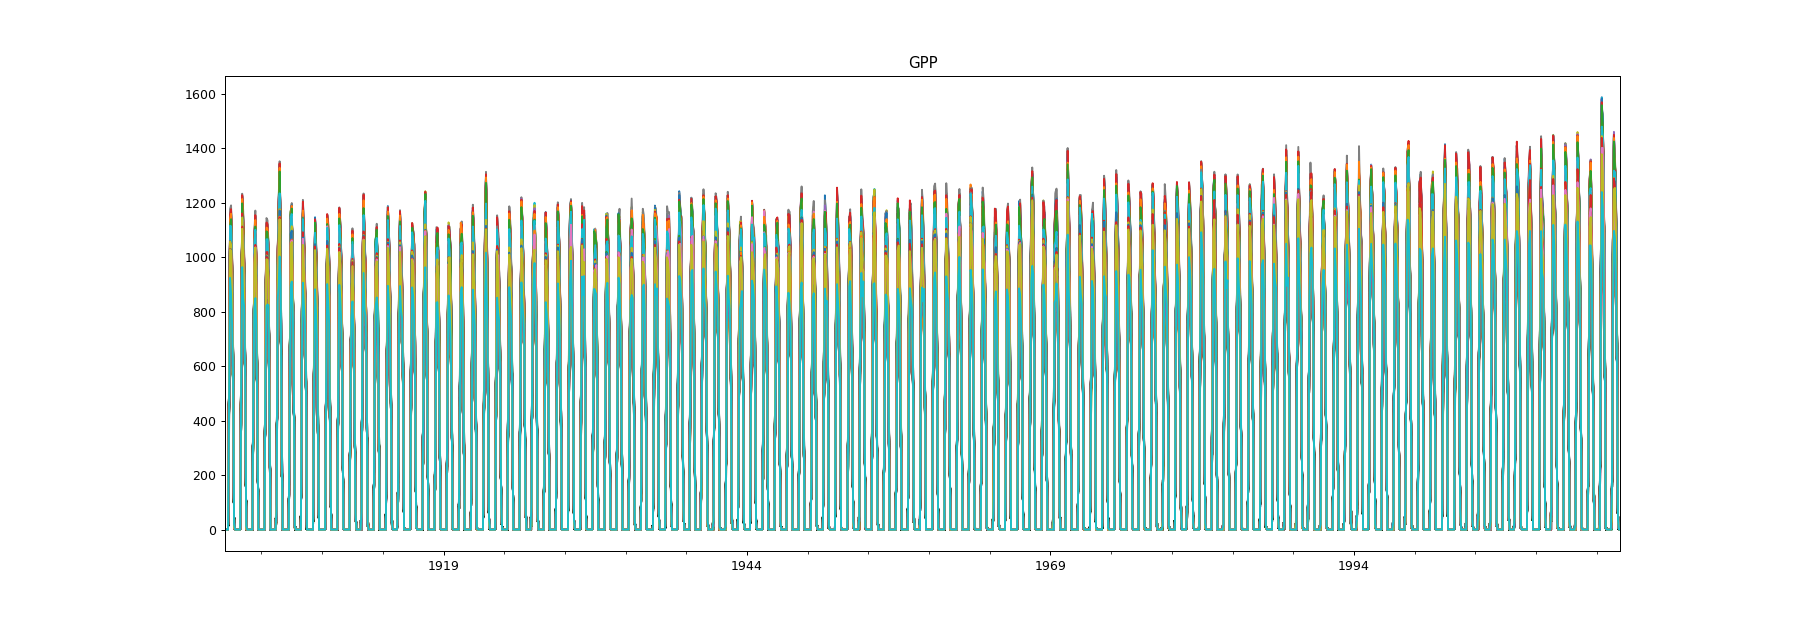

<AxesSubplot:title={'center':'GPP'}>

In [ ]:
#visualize the ouputs
%matplotlib notebook
gpp.plot(figsize=(20,7), legend=False,title='GPP')

#### Now read in the sample matrix, which contains parameter values per run

In [ ]:
fdir2='/home/vbriones/tem-output/'
df_sample_matrix= pd.read_csv(fdird+'_sample_matrix.csv')  
df_sample_matrix=df_sample_matrix.drop(['initial_lai'],axis=1)
df_sample_matrix

,cmax,glmax,toptmax,initial_lai,nmax,albvisnir
0,2474.836992,0.003024,27.005105,0.0,59.504992,0.081146
1,2856.493514,0.003621,21.386132,0.0,72.555028,0.101490
2,3060.335447,0.002743,17.852271,0.0,82.980835,0.098955
3,2465.451588,0.002577,19.817018,0.0,62.940642,0.105789
4,2112.884162,0.002571,23.752199,0.0,69.750848,0.090042
...,...,...,...,...,...,...
995,2000.878950,0.002727,17.401831,0.0,74.001153,0.082094
996,2639.323661,0.002944,20.009004,0.0,55.142345,0.081688
997,1978.840890,0.003125,28.160688,0.0,66.927543,0.078776
998,2694.768986,0.003154,21.336734,0.0,79.472663,0.086630


#### We will now produce a correlation plot to compare parameters vs. gpp

In [ ]:
output_matrix=np.zeros((df_sample_matrix.shape[0], 1))
output_matrix[:,0]=gpp.mean().values
df_output_matrix=pd.DataFrame(output_matrix, 
                           columns=["gpp"])

df_sample_matrix = df_sample_matrix.join(df_output_matrix)
df_sample_matrix.head()

,cmax,glmax,toptmax,initial_lai,nmax,albvisnir,gpp
0,2474.836992,0.003024,27.005105,0.0,59.504992,0.081146,345.087470
1,2856.493514,0.003621,21.386132,0.0,72.555028,0.101490,359.260626
2,3060.335447,0.002743,17.852271,0.0,82.980835,0.098955,392.604371
3,2465.451588,0.002577,19.817018,0.0,62.940642,0.105789,352.551282
4,2112.884162,0.002571,23.752199,0.0,69.750848,0.090042,328.483080


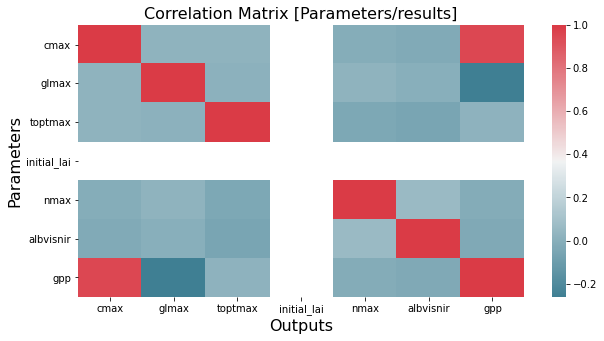

In [ ]:
#visualize the correlation of a sample matrix
%matplotlib inline
nsample=6
corr=df_sample_matrix.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),center=0)
plt.title('Correlation Matrix [Parameters/results]',fontsize=16);
plt.ylabel('Parameters',fontsize=16)
plt.xlabel('Outputs',fontsize=16);

Text(0, 0.5, 'gpp')

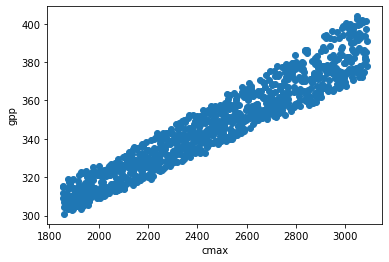

In [ ]:
#let's study some correlations!
plt.plot(df_sample_matrix['cmax'],df_sample_matrix['gpp'],'o')
plt.xlabel('cmax')
plt.ylabel('gpp')

##### Part B (Optional)
Here we can compare other variables in addition to GPPP from the same Sensitivity Run

In [ ]:
# Optional
def get_output_var_size(fdir,oname):   
    filename = fdir+'Sample_Folder/'+item+'/output/'+oname+'_monthly_tr.nc'
    stg_data = nc.Dataset(filename, 'r')
    print('{} dim:',oname,len(stg_data.dimensions))

def get_samples(fdir,oname):
    #make a list of all output files  
    
    fname = oname+'_monthly_tr.nc'
    fsamples = []
    for item in os.listdir(fdir):
        if item[:6]=='sample':
            fsamples.append(fdir+item+'/output/'+fname)
    fsamples.sort()

    return fsamples

def get_output_var_size(fdir,oname):   
    filename = fdir+item+'/output/'+oname+'_monthly_tr.nc'
    stg_data = nc.Dataset(filename, 'r')
    print(oname,'dim:',len(stg_data.dimensions))

    
def plot3D_ts(fdir,oname):
    fsamples = get_samples(fdir,oname)
    #get the 'oname' variable time series from the correspoding output nc files  
    stg_data = nc.Dataset(fsamples[0], 'r')
    #print(stg_data.shape)
    
    df1 = pd.DataFrame(stg_data.variables[oname][0:,0,0], columns=[oname+'_0'])   
    for i in range(1,len(fsamples)):
        stg_data = nc.Dataset(fsamples[i], 'r')
        df2 = pd.DataFrame(stg_data.variables[oname][0:,0,0], columns=[oname+'_'+str(i)])
        df1 = df1.join(df2)
    df1 = df1.set_index(pd.Series(pd.period_range("1/01/1901", freq="M", periods=1380)))
    return df1


gpp = plot3D_ts(fdir,'GPP')
##vegc=plot3D_ts(fdir,'VEGC')##run vegc seperately since it is yearly not monthly
rh=plot3D_ts(fdir,'RH')

In [ ]:
#to enable an interactive plot
%matplotlib inline

<IPython.core.display.Javascript object>


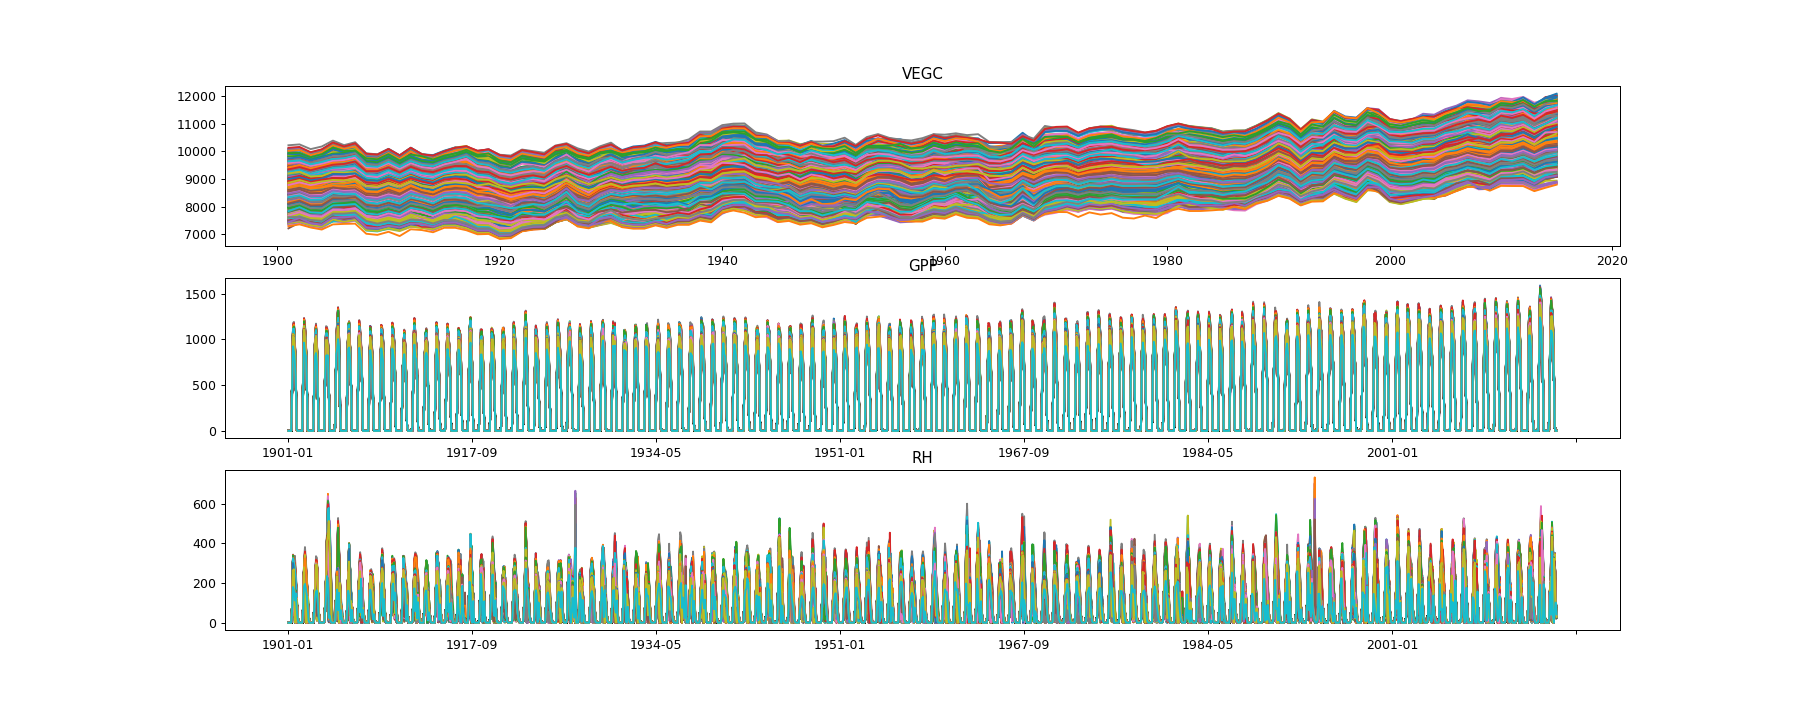

<AxesSubplot:title={'center':'RH'}>

In [ ]:
#visualize the ouputs
%matplotlib notebook
figure, axes = plt.subplots(3,1,figsize=(20,8))
vegc.plot( ax=axes[0],legend=False,title='VEGC')
gpp.plot( ax=axes[1],legend=False,title='GPP')
rh.plot( ax=axes[2],legend=False,title='RH')


#### Now read in the sample matrix, which contains parameter values per run

In [ ]:
fdir2='/home/vbriones/tem-output/'
df_sample_matrix= pd.read_csv(fdir+'/_sample_matrix.csv')  
df_sample_matrix=df_sample_matrix.drop(['initial_lai'],axis=1)
df_sample_matrix

,cmax,glmax,toptmax,initial_lai,nmax,albvisnir
0,2474.836992,0.003024,27.005105,0.0,59.504992,0.081146
1,2856.493514,0.003621,21.386132,0.0,72.555028,0.101490
2,3060.335447,0.002743,17.852271,0.0,82.980835,0.098955
3,2465.451588,0.002577,19.817018,0.0,62.940642,0.105789
4,2112.884162,0.002571,23.752199,0.0,69.750848,0.090042
...,...,...,...,...,...,...
995,2000.878950,0.002727,17.401831,0.0,74.001153,0.082094
996,2639.323661,0.002944,20.009004,0.0,55.142345,0.081688
997,1978.840890,0.003125,28.160688,0.0,66.927543,0.078776
998,2694.768986,0.003154,21.336734,0.0,79.472663,0.086630


In [ ]:
output_matrix=np.zeros((df_sample_matrix.shape[0], 3))
output_matrix[:,0]=gpp.mean().values
output_matrix[:,1]=vegc.mean().values
output_matrix[:,2]=rh.mean().values
df_output_matrix=pd.DataFrame(output_matrix, 
                           columns=['gpp','vegc','rh'])

df_sample_matrix = df_sample_matrix.join(df_output_matrix)
df_sample_matrix.head()

,cmax,glmax,toptmax,initial_lai,nmax,albvisnir,gpp,vegc,rh
0,2474.836992,0.003024,27.005105,0.0,59.504992,0.081146,345.087470,9009.408463,70.830209
1,2856.493514,0.003621,21.386132,0.0,72.555028,0.101490,359.260626,9399.415209,80.972513
2,3060.335447,0.002743,17.852271,0.0,82.980835,0.098955,392.604371,10406.315954,101.724723
3,2465.451588,0.002577,19.817018,0.0,62.940642,0.105789,352.551282,9168.544685,75.785762
4,2112.884162,0.002571,23.752199,0.0,69.750848,0.090042,328.483080,8513.407624,62.137460


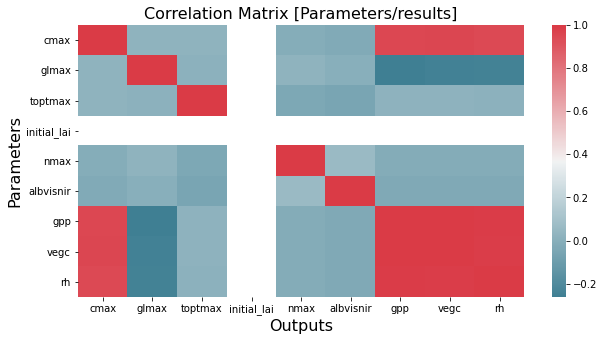

In [ ]:
#visualize the correlation of a sample matrix
%matplotlib inline

nsample=6
corr=df_sample_matrix.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),center=0)
plt.title('Correlation Matrix [Parameters/results]',fontsize=16);
plt.ylabel('Parameters',fontsize=16)
plt.xlabel('Outputs',fontsize=16);

Text(0, 0.5, 'vegc')

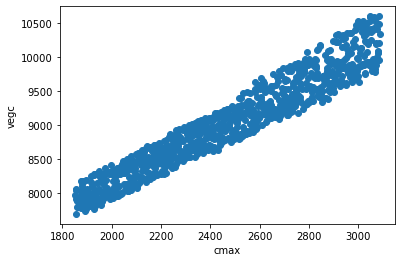

In [ ]:
#let's study some weird correlations
plt.plot(df_sample_matrix['cmax'],df_sample_matrix['vegc'],'o')
plt.xlabel('cmax')
plt.ylabel('vegc')